In [7]:
cd /path/to/bootcamp_Shuchen_Meng/homework/homework6

[Errno 2] No such file or directory: '/path/to/bootcamp_Shuchen_Meng/homework/homework6'
/Users/mengmeng/bootcamp_Shuchen_Meng/homework/homework6


/opt/anaconda3/envs/bootcamp_env/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [8]:
%mkdir -p data/raw data/processed src notebooks docs

In [13]:
import pandas as pd
df = pd.read_csv("data/raw/instructor_dirty.csv")
df.head()

,numeric_col,category_col,price,date_str,category
0,10.0,A,$100,2025-08-01,Electronics
1,NaN,B,$200,2025-08-02,Furniture
2,40.0,A,$150,NaN,Toys
3,55.0,B,NaN,2025-08-04,Clothing
4,70.0,C,$250,2025-08-05,NaN


In [14]:
import numpy as np

def missing_summary(df):
    ms = df.isna().sum().to_frame(name='missing')
    ms['pct_missing'] = ms['missing'] / len(df)
    return ms.sort_values('pct_missing', ascending=False)

before_shape = df.shape
before_missing = missing_summary(df)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

print({"rows": before_shape[0], "cols": before_shape[1], "num_cols": len(num_cols), "cat_cols": len(cat_cols)})
before_missing.head(10)

{'rows': 5, 'cols': 5, 'num_cols': 1, 'cat_cols': 4}


,missing,pct_missing
numeric_col,1,0.2
price,1,0.2
date_str,1,0.2
category,1,0.2
category_col,0,0.0


In [24]:
from src.cleaning import fill_missing_median, drop_missing, normalize_data

# Fill missing numeric with column medians
step1 = fill_missing_median(df)

# Drop any rows still containing NaN (adjust subset if only some columns must be complete)
step2 = drop_missing(step1,how='all')

# Normalize numeric columns (choose method)
cleaned, norm_params = normalize_data(step2, method='zscore')  # or 'minmax'
cleaned.head()

,numeric_col,category_col,price,date_str,category
0,-1.733690,A,$100,2025-08-01,Electronics
1,0.150756,B,$200,2025-08-02,Furniture
2,-0.226134,A,$150,NaN,Toys
3,0.527645,B,NaN,2025-08-04,Clothing
4,1.281423,C,$250,2025-08-05,NaN


In [26]:
!pwd

/Users/mengmeng/bootcamp_Shuchen_Meng/homework/homework6


In [28]:
cleaned.to_csv('data/processed/cleaned_data.csv', index=False)

In [29]:
after_shape = cleaned.shape
after_missing = missing_summary(cleaned)

print("BEFORE rows, cols:", before_shape)
print("AFTER  rows, cols:", after_shape)

comp_missing = before_missing.join(after_missing, lsuffix='_before', rsuffix='_after').fillna(0)
comp_missing.sort_values('pct_missing_before', ascending=False).head(10)


BEFORE rows, cols: (5, 5)
AFTER  rows, cols: (5, 5)


,missing_before,pct_missing_before,missing_after,pct_missing_after
numeric_col,1,0.2,0,0.0
price,1,0.2,1,0.2
date_str,1,0.2,1,0.2
category,1,0.2,1,0.2
category_col,0,0.0,0,0.0


In [30]:
# Numeric summary comparison for a few columns
preview_cols = num_cols[:8]
summary_before = df[preview_cols].describe().T[["mean","std","min","max"]] if preview_cols else None
summary_after  = cleaned[preview_cols].describe().T[["mean","std","min","max"]] if preview_cols else None
summary_before, summary_after

(              mean        std   min   max
 numeric_col  43.75  25.617377  10.0  70.0,
              mean       std      min       max
 numeric_col   0.0  1.118034 -1.73369  1.281423)

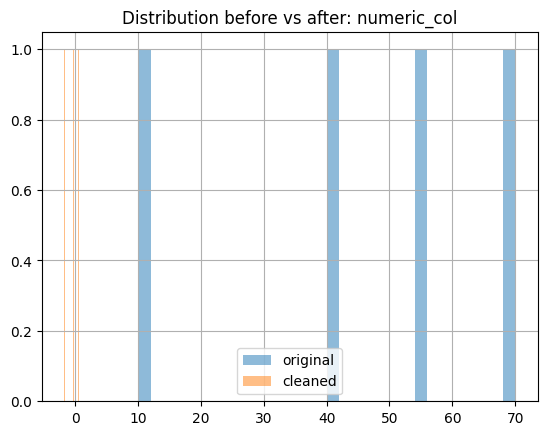

In [31]:
import matplotlib.pyplot as plt
if num_cols:
    col = num_cols[0]
    plt.figure()
    plt.hist(df[col].dropna(), bins=30, alpha=0.5, label='original')
    plt.hist(cleaned[col].dropna(), bins=30, alpha=0.5, label='cleaned')
    plt.title(f"Distribution before vs after: {col}")
    plt.legend(); plt.grid(True); plt.show()

In [ ]:
!git add .
!git